In [2]:
import pandas as pd
col =  ["NOP","Plasma","BP","TSKIN_THICKNESS","SERUM_INSULIN","BMI","PEDIGREE","AGE","Target"]
diabetes = pd.read_csv("datasets/Diabetes/pima-indians-diabetes.csv",names = col)

In [3]:
diabetes[5:12]

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE,Target
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1


In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes_target = diabetes['Target']

In [6]:
diabetes_target.head()

0    1
1    0
2    1
3    0
4    1
Name: Target, dtype: int64

In [7]:
diabetes_target.shape

(768L,)

In [8]:
diabetes_data = diabetes.drop(columns='Target')

In [9]:
diabetes_data.head()

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
NOP                768 non-null int64
Plasma             768 non-null int64
BP                 768 non-null int64
TSKIN_THICKNESS    768 non-null int64
SERUM_INSULIN      768 non-null int64
BMI                768 non-null float64
PEDIGREE           768 non-null float64
AGE                768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [11]:
diabetes_data.describe()

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [12]:
# lets work on data as it as without separating target value
import pandas as pd
col =  ["NOP","Plasma","BP","TSKIN_THICKNESS","SERUM_INSULIN","BMI","PEDIGREE","AGE","Target"]
diabetes = pd.read_csv("datasets/Diabetes/pima-indians-diabetes.csv",names = col)

In [13]:
from matplotlib import pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000103F7DA0>,
      dtype=object)

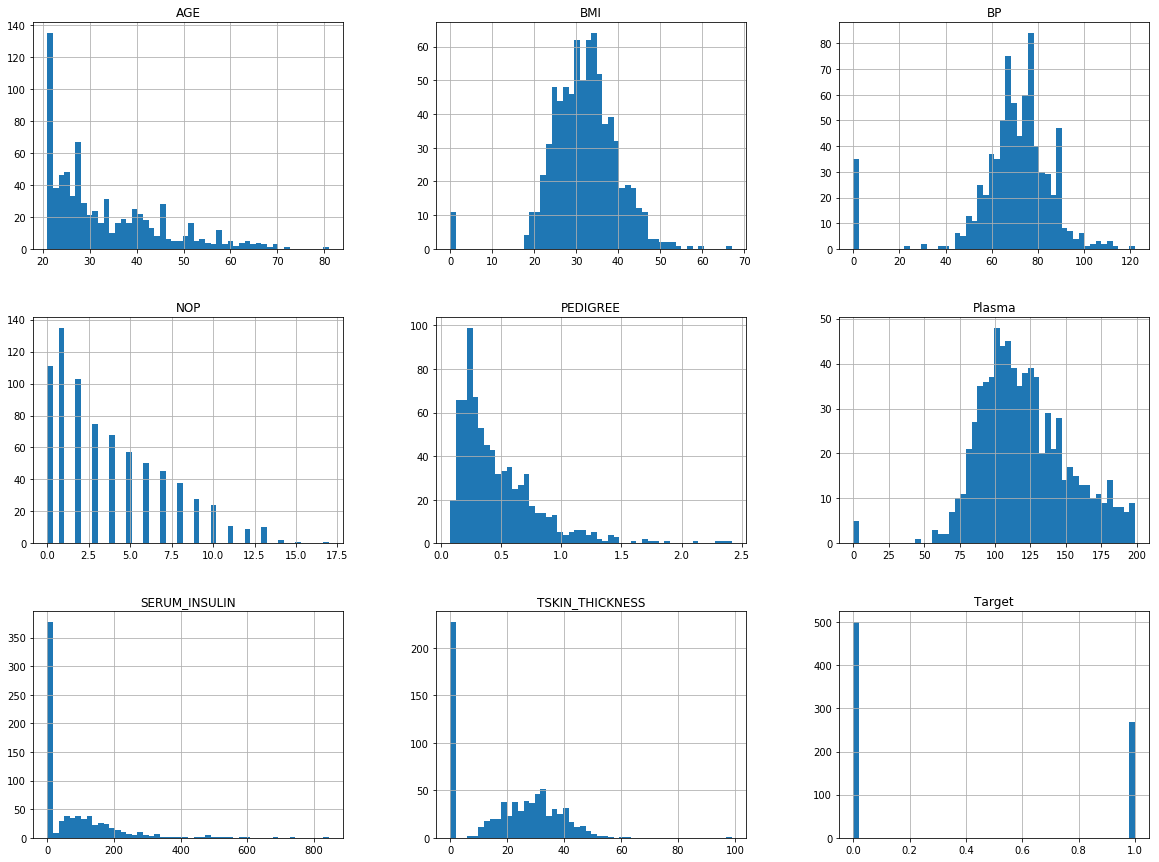

In [14]:
diabetes.hist(bins=50,figsize=(20,15))

In [15]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
train_set,test_set = split_train_test(diabetes,0.2)

In [17]:
print("train", len(train_set) , "test" , len(test_set))

('train', 615, 'test', 153)


In [18]:
train_set.head()

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE,Target
462,8,74,70,40,49,35.3,0.705,39,0
60,2,84,0,0,0,0.0,0.304,21,0
618,9,112,82,24,0,28.2,1.282,50,1
346,1,139,46,19,83,28.7,0.654,22,0
294,0,161,50,0,0,21.9,0.254,65,0


In [19]:
type(diabetes)

pandas.core.frame.DataFrame

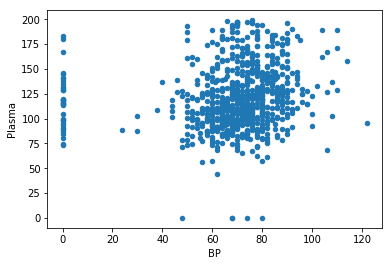

In [20]:
diabetes.plot(kind="scatter",x = "BP", y ="Plasma")

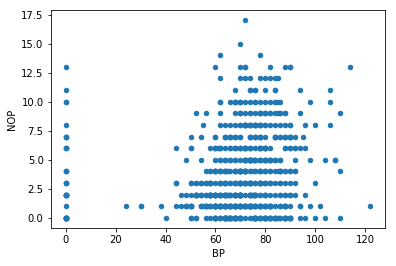

In [21]:
diabetes.plot(kind="scatter",x = "BP", y ="NOP")

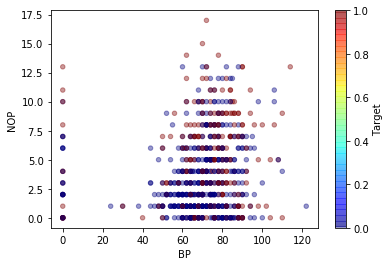

In [22]:
diabetes.plot(kind="scatter",x="BP",y="NOP",alpha=0.4, c="Target", cmap=plt.get_cmap("jet"),colorbar=True,)

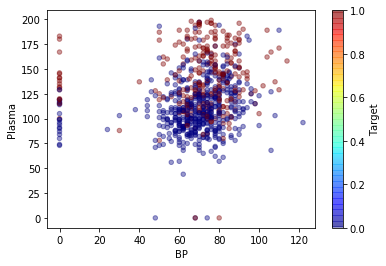

In [23]:
diabetes.plot(kind="scatter",x="BP",y="Plasma",alpha=0.4, c="Target", cmap=plt.get_cmap("jet"),colorbar=True,)

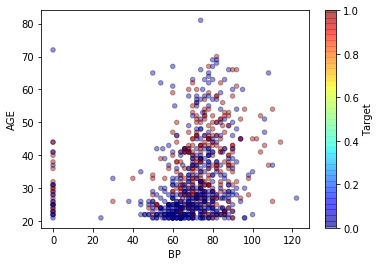

In [24]:
diabetes.plot(kind="scatter",x="BP",y="AGE",alpha=0.4, c="Target", cmap=plt.get_cmap("jet"),colorbar=True,)

In [25]:
correlation_matrix = diabetes.corr()

In [26]:
correlation_matrix

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE,Target
NOP,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
TSKIN_THICKNESS,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
SERUM_INSULIN,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
PEDIGREE,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
AGE,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Target,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [27]:
correlation_matrix["Target"].sort_values(ascending=False)

Target             1.000000
Plasma             0.466581
BMI                0.292695
AGE                0.238356
NOP                0.221898
PEDIGREE           0.173844
SERUM_INSULIN      0.130548
TSKIN_THICKNESS    0.074752
BP                 0.065068
Name: Target, dtype: float64

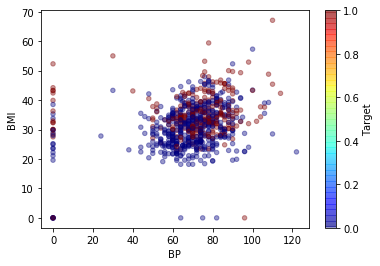

In [28]:
diabetes.plot(kind="scatter",x="BP",y="BMI",alpha=0.4, c="Target", cmap=plt.get_cmap("jet"),colorbar=True,)

It seems Diabetes has a fair corelation with Plasma and little bit with BMI but graph does not show much relation with others. Will remove outliers also later for NOP and age

In [29]:
from pandas.plotting import scatter_matrix
attributes = ["Target","Plasma","BMI","AGE"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014FE2470>,
      dtype=object)

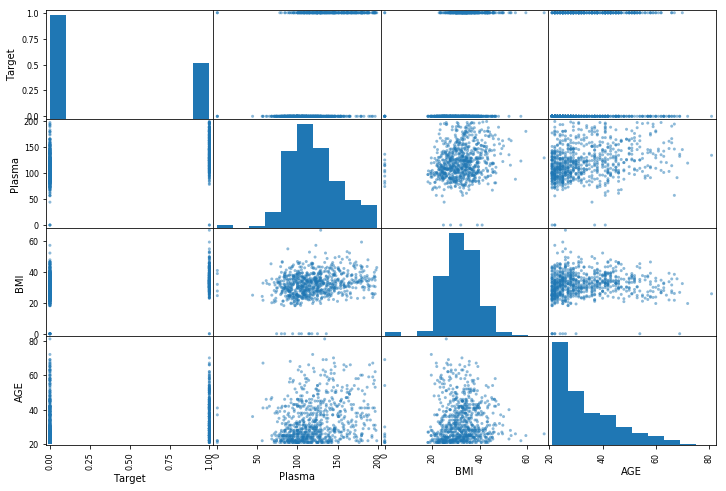

In [30]:
scatter_matrix(diabetes[attributes],figsize=(12,8))

In [31]:
# Cleaning the data, remove data of 0 BMI

diabetes_cleaned = diabetes[diabetes["BMI"]>0]

In [32]:
diabetes_cleaned.shape

(757, 9)

In [33]:
diabetes_cleaned = diabetes_cleaned[diabetes_cleaned["BP"]>0] # remove data of 0 BP

In [34]:
diabetes_cleaned.shape

(729, 9)

In [35]:
diabetes_cleaned = diabetes_cleaned[diabetes_cleaned["Plasma"]>0] # remove data of 0 Plasma

In [36]:
diabetes_cleaned.shape

(724, 9)

In [37]:
diabetes[diabetes["SERUM_INSULIN"]>0].count()

NOP                394
Plasma             394
BP                 394
TSKIN_THICKNESS    394
SERUM_INSULIN      394
BMI                394
PEDIGREE           394
AGE                394
Target             394
dtype: int64

### Not removing 0 insulin as it will reduce data alomst to half

In [38]:
diabetes_cleaned.shape

(724, 9)

In [39]:
diabetes[diabetes["TSKIN_THICKNESS"]>0].count()

NOP                541
Plasma             541
BP                 541
TSKIN_THICKNESS    541
SERUM_INSULIN      541
BMI                541
PEDIGREE           541
AGE                541
Target             541
dtype: int64

### Also not removing tskin as it has 541 count and data will be reduced very much

In [40]:
diabetes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 9 columns):
NOP                724 non-null int64
Plasma             724 non-null int64
BP                 724 non-null int64
TSKIN_THICKNESS    724 non-null int64
SERUM_INSULIN      724 non-null int64
BMI                724 non-null float64
PEDIGREE           724 non-null float64
AGE                724 non-null int64
Target             724 non-null int64
dtypes: float64(2), int64(7)
memory usage: 56.6 KB


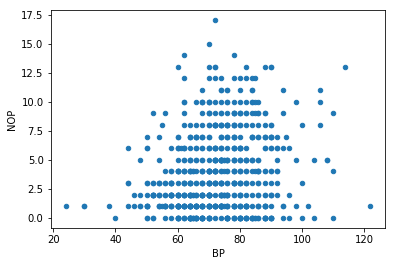

In [41]:
diabetes_cleaned.plot(kind="scatter",x = "BP", y ="NOP")

In [42]:
df_nop = diabetes_cleaned[diabetes_cleaned["NOP"]>12].shape

In [43]:
diabetes_cleaned[diabetes_cleaned["NOP"]>13]

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE,Target
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [44]:
# lets remove NOP 17 outlier 
diabetes_cleaned = diabetes_cleaned[diabetes_cleaned["NOP"]<17]

In [45]:
diabetes_cleaned.shape

(723, 9)

In [46]:
diabetes_cleaned[diabetes_cleaned["AGE"]>65]

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE,Target
123,5,132,80,0,0,26.8,0.186,69,0
221,2,158,90,0,0,31.6,0.805,66,1
363,4,146,78,0,0,38.5,0.520,67,1
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
495,6,166,74,0,0,26.6,0.304,66,0
537,0,57,60,0,0,21.7,0.735,67,0
552,6,114,88,0,0,27.8,0.247,66,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0


In [47]:
# LETS keep all ages

In [48]:
diabetes_cleaned_target = diabetes_cleaned["Target"]

In [49]:
diabetes_cleaned_target.shape

(723L,)

In [50]:
diabetes_cleaned_data = diabetes_cleaned.drop(columns='Target')

In [51]:
diabetes_cleaned_data.shape

(723, 8)

In [52]:
#Coverting to numpy array to use scikit

In [53]:
diabetes_data = np.array(diabetes_cleaned_data)

In [54]:
diabetes_data

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [55]:
diabetes_target=np.array(diabetes_cleaned_target)

In [56]:
diabetes_target.shape

(723L,)

In [57]:
X= diabetes_data
y = diabetes_target

In [58]:
X_train,X_test, y_train,y_test = X[:700],X[700:],y[:700],y[700:]

In [59]:
import numpy as np
shuffle_index = np.random.permutation(700)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

In [60]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

c:\python27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
X_test[5],y_test[5]

(array([  4.   , 136.   ,  70.   ,   0.   ,   0.   ,  31.2  ,   1.182,
         22.   ]), 1)

In [62]:
sgd_clf.predict([X_test[5]])

array([1], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
y_train_predict = sgd_clf.predict(X_train)

In [65]:
accuracy_score(y_train,y_train_predict)

0.5542857142857143

In [66]:
# cross validation score
from sklearn.model_selection import cross_val_score

In [67]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring = "accuracy")

array([0.53846154, 0.50643777, 0.69957082])

In [68]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train,cv=3)

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[230, 233],
       [ 60, 177]], dtype=int64)

In [70]:
from sklearn.metrics import precision_score,recall_score

In [71]:
precision_score(y_train,y_train_pred)

0.4317073170731707

In [72]:
recall_score(y_train,y_train_pred)

0.7468354430379747

In [73]:
from sklearn.metrics import f1_score

In [74]:
f1_score(y_train,y_train_pred)

0.5471406491499228

In [75]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train,cv=3, method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores) 

#### cross_val_predict give prediction by default as default method is predict and gives score when methos is set to decision_function

### with SGD method "predict_proba" does not work due to loss function hinge. what does that mean?

In [105]:
y_scores_pred = cross_val_predict(sgd_clf,X_train,y_train,cv=3)

In [106]:
y_scores_2 = cross_val_score(sgd_clf,X_train,y_train,cv=3)

In [111]:
y_scores.shape,y_scores_2.shape,X_train.shape

((700L,), (3L,), (700L, 8L))

#### Above y_scores of cross_val_predict using method = decision function gives each training instance score whereas cross_val_score gives score of each cross validation run. Hence y_scores has 700 length array and y_scores_2 has 3 as cv=3.

In [76]:
precisions.shape,recalls.shape,thresholds.shape,y_scores.shape

((697L,), (697L,), (696L,), (700L,))

### For decision trees and knn decision function does not work and to get y_score, predict_proba is used.

In [77]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label = "Precision")
    plt.plot(thresholds, recalls[:-1],"g-",label = "Recall")
    plt.xlabel("Thresholds")
    plt.legend(loc="upper left")
    plt.ylim([0,2])
    #plt.xlim([0,25000])

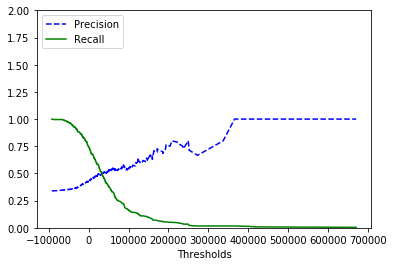

In [78]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [79]:
y_train_pred_updated_threshold = (y_scores > 12000)

In [80]:
precision_score(y_train,y_train_pred_updated_threshold)

0.4626865671641791

In [81]:
recall_score(y_train,y_train_pred_updated_threshold)

0.6540084388185654

In [82]:
f1_score(y_train,y_train_pred_updated_threshold)
# not better

0.541958041958042

In [83]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_train, y_scores)

### in roc_curve y_scores(Target scores) can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).

In [112]:
def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    # x and corresponding y ex. [x1,x2] and [y1,y2]
    plt.plot([0,1],[0,1],'k--')
    # axis xmin,xmax,ymin,ymax
    plt.axis([0,1,0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    

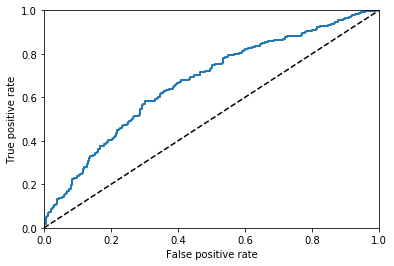

In [113]:
plot_roc_curve(fpr,tpr)

In [114]:
# area under the curve AKA ROC AUC(area under the curve)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.6694461911401518

#### Compare models using train/ test data, this trained on training data and tested on test data.

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [150]:


def getModelScore(models,X_train,y_train,X_test,y_test):
    names = []
    scores = []
    for name, model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test,y_pred)
        scores.append(score)
        names.append(name)
    return scores,names
    
    


In [151]:
scores,names = getModelScore(models,X_train,y_train,X_test,y_test)

In [160]:
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split.sort_values("Score",ascending=False)

,Name,Score
0,KNN,0.869565
2,LR,0.869565
6,GB,0.869565
3,DT,0.826087
4,GNB,0.695652
5,RF,0.695652
1,SVC,0.521739


#### Lets calculate training error and testing error on each model

In [161]:

def getModelTrainingTestScores(models,X_train,y_train,X_test,y_test):
    names = []
    training_scores = []
    testing_scores = []
    for name, model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        training_score = accuracy_score(y_train,y_pred_train)
        testing_score = accuracy_score(y_test,y_pred)
        training_scores.append(training_score)
        testing_scores.append(testing_score)
        names.append(name)
    return training_scores,testing_scores,names

In [162]:
training_scores,testing_scores,names = getModelTrainingTestScores(models,X_train,y_train,X_test,y_test)

In [420]:
tr_split_scores = pd.DataFrame({'Name': names, 'TrainingScore': training_scores,"TestingScore" :testing_scores })
tr_split_scores.sort_values("TestingScore",ascending=False)

,Name,TestingScore,TrainingScore
0,SVC,0.869565,0.800000
2,KNeighbors Classifier,0.869565,0.775714
3,Decision Tree,0.869565,1.000000
6,Gradient Boosting Classifier,0.869565,0.920000
5,Random Forest Classifier,0.739130,0.981429
4,GaussianNB,0.695652,0.760000
1,Logistic Regression,0.521739,1.000000


#### Seems like SVC is overfitting but accuracy measure is not ideal one to assess model perfection for classification task, should do with ROC area under the curve

### Lets first check accuracy with cross validation

In [421]:


def getModelScoreCV(models,X_train,y_train,X_test,y_test):
    names = []
    scores = []
    for name, model in models:
        model.fit(X,y)
        score = cross_val_score(model,X_train,y_train,cv=3,scoring="accuracy").mean()
        scores.append(score)
        names.append(name)
    return scores,names
    

In [422]:

scores,names = getModelScoreCV(models,X_train,y_train,X_test,y_test)


In [423]:
tr_split_CV = pd.DataFrame({'Name': names, 'Score': scores})


In [424]:
tr_split_CV.sort_values("Score" , ascending=False)

,Name,Score
4,GaussianNB,0.755713
1,Logistic Regression,0.752901
6,Gradient Boosting Classifier,0.749979
5,Random Forest Classifier,0.742874
2,KNeighbors Classifier,0.714329
3,Decision Tree,0.688603
0,SVC,0.661427


#### Result are surprisingly opposite of train/test result above. Here LR wins the first place.

In [511]:
from sklearn.metrics import roc_auc_score


def getROCScoreModels(models,X_train,y_train):
    scores = []
    names = []
    for name, model in models:
        model.fit(X,y)
        print(name)
        if name in ['SVC','LR']:
            y_scores = cross_val_predict(model,X_train,y_train,cv=3, method="decision_function")
            score = roc_auc_score(y_train, y_scores)
        else:
            y_scores = cross_val_predict(model,X_train,y_train,cv=3, method = "predict_proba")
            y_scores = y_scores[:,1]
        score = roc_auc_score(y_train, y_scores)
        scores.append(score)
        names.append(name)
    return scores,names

def getModels():
    models = []
    models.append(('SVC', SVC()))
    models.append(('Logistic Regression', LogisticRegression()))
    models.append(('KNeighbors Classifier', KNeighborsClassifier()))
    models.append(('Decision Tree', DecisionTreeClassifier()))
    models.append(('GaussianNB', GaussianNB()))
    models.append(('Random Forest Classifier', RandomForestClassifier()))
    models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
    return models

In [512]:
models = getModels()
scores,names = getROCScoreModels(models,X_train,y_train)

SVC
Logistic Regression
KNeighbors Classifier
Decision Tree
GaussianNB
Random Forest Classifier
Gradient Boosting Classifier


In [515]:
ROC_Scores = pd.DataFrame({"Name" : names, "ROC AUC score" : scores})

In [516]:
ROC_Scores.sort_values("ROC AUC score",ascending=False)

,Name,ROC AUC score
6,Gradient Boosting Classifier,0.812669
1,Logistic Regression,0.810327
4,GaussianNB,0.805069
5,Random Forest Classifier,0.794069
2,KNeighbors Classifier,0.728860
3,Decision Tree,0.656852
0,SVC,0.534639


In [432]:
def getPrecisionRecallThreshold(name, model,X_train,y_train):
    model.fit(X,y)
    if name in ['SVC','Logistic Regression']:
        y_scores = cross_val_predict(model,X_train,y_train,cv=3)
    else:
        y_scores = cross_val_predict(model,X_train,y_train,cv=3, method = "predict_proba")
    precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores)
    return precisions, recalls, thresholds


In [433]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label = "Precision")
    plt.plot(thresholds, recalls[:-1],"g-",label = "Recall")
    plt.xlabel("Thresholds")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

In [434]:
models[1][0],models[1][1]
name = models[1][0]
model = models[1][1]
name,model

('Logistic Regression',
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))

In [504]:
precisions, recalls, thresholds = getPrecisionRecallThreshold(name,model,X_train,y_train)

ValueError: bad input shape (700L, 2L)

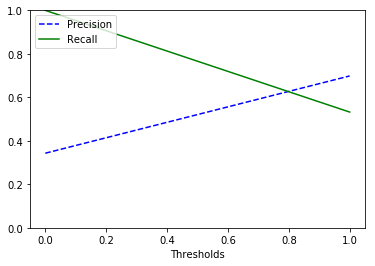

In [505]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [506]:
#get recall and precision for all models
from sklearn.metrics import recall_score,precision_score,f1_score


def getRecallPrecisionModels(models,X_train,y_train):
    recall_scores = []
    precision_scores = []
    f1_scores = []
    names = []
    for name, model in models:
        model.fit(X,y)
        y_pred = cross_val_predict(model,X_train,y_train,cv=3)
        recall = recall_score(y_train,y_pred)
        precision = precision_score(y_train,y_pred)
        f1 = f1_score(y_train,y_pred)
        recall_scores.append(recall)
        precision_scores.append(precision)
        names.append(name)
        f1_scores.append(f1)
    return recall_scores,precision_scores,names,f1_scores

In [507]:
recall_scores,precision_scores,name,f1_scores = getRecallPrecisionModels(models,X_train,y_train)

In [508]:
scores_Models = pd.DataFrame({"recall_scores":recall_scores,"precision_scores":precision_scores,"name":name,"f1_scores":f1_scores})

In [509]:
scores_Models.sort_values("f1_scores",ascending=False)

,f1_scores,name,precision_scores,recall_scores
4,0.622517,GaussianNB,0.652778,0.594937
6,0.612613,Gradient Boosting Classifier,0.657005,0.573840
5,0.598575,Random Forest Classifier,0.684783,0.531646
1,0.579075,Logistic Regression,0.683908,0.502110
2,0.539171,KNeighbors Classifier,0.593909,0.493671
3,0.524946,Decision Tree,0.540179,0.510549
0,0.000000,SVC,0.000000,0.000000


In [510]:
# plotting ROC curve
%matplotlib inline
def plot_roc_curve(fpr,tpr,name):
    plt.plot(fpr,tpr,linewidth=2,label=name)
    # x and corresponding y ex. [x1,x2] and [y1,y2]
    plt.plot([0,1],[0,1],'k--')
    # axis xmin,xmax,ymin,ymax
    plt.axis([0,1,0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

from sklearn.metrics import roc_curve

def ROCCurveModel(model,name,X_train,y_train):
    model.fit(X_train,y_train)
    if name in ['SVC','Logistic Regression']:
        y_pred_score = cross_val_predict(model,X_train,y_train,cv=3,method="decision_function")
        fpr,tpr,threshold = roc_curve(y_train, y_pred_score)
    else:
        y_pred = cross_val_predict(model,X_train,y_train,cv=3,method="predict_proba")
        fpr,tpr,threshold = roc_curve(y_train, y_pred[:,1])
    return fpr,tpr,threshold

In [456]:
def plot_all_models_ROC_curve(models,X_train,y_train):
    for name, model in models:
        model.fit(X_train,y_train)
        fpr,tpr,threshold = ROCCurveModel(model,name,X_train,y_train)
        plot_roc_curve(fpr,tpr,name)

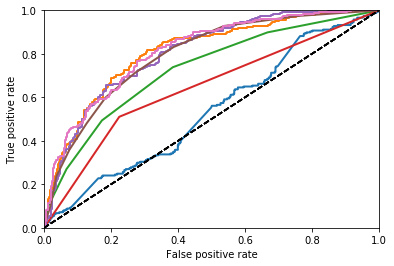

In [457]:
plot_all_models_ROC_curve(models,X_train,y_train)

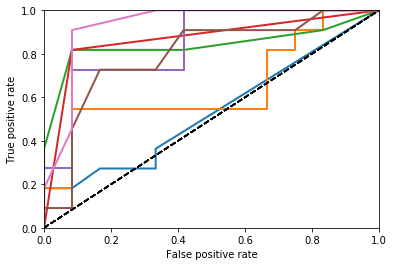

In [458]:
# lets try how would it perform on test data
plot_all_models_ROC_curve(models,X_test,y_test)

In [459]:
models

[('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)),
 ('Logistic Regression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('KNeighbors Classifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('Decision Tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_lea

In [462]:
SVC_name = models[0][0]
SVC_model = models[0][1]

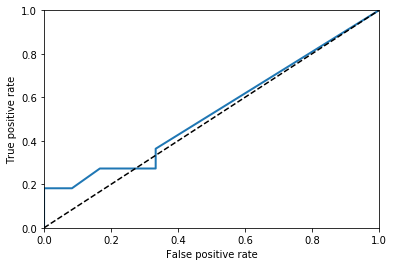

In [464]:
fpr,tpr,threshold = ROCCurveModel(SVC_model,SVC_name,X_test,y_test)
plot_roc_curve(fpr,tpr,name)

In [467]:
Logistic_Regression_name = models[1][0]
Logistic_Regression_model = models[1][1]

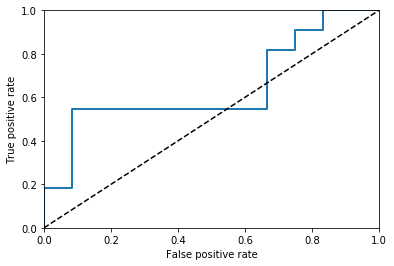

In [468]:
fpr,tpr,threshold = ROCCurveModel(Logistic_Regression_model,Logistic_Regression_name,X_test,y_test)
plot_roc_curve(fpr,tpr,Logistic_Regression_name)

In [469]:
models

[('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)),
 ('Logistic Regression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('KNeighbors Classifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('Decision Tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_lea

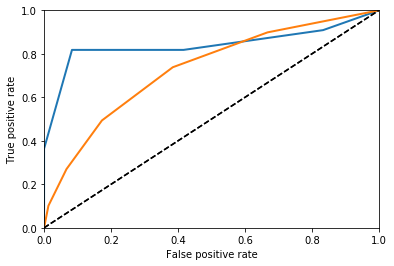

In [496]:
KNeighbors_Classifier_name = models[2][0]
KNeighbors_Classifier_model = models[2][1]
fpr,tpr,threshold = ROCCurveModel(KNeighbors_Classifier_model,KNeighbors_Classifier_name,X_test,y_test)
plot_roc_curve(fpr,tpr,KNeighbors_Classifier_name)
fpr,tpr,threshold = ROCCurveModel(KNeighbors_Classifier_model,KNeighbors_Classifier_name,X_train,y_train)
plot_roc_curve(fpr,tpr,KNeighbors_Classifier_name)

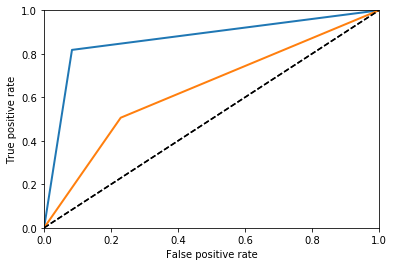

In [494]:
Decision_Tree_name = models[3][0]
Decision_Tree_model = models[3][1]
fpr,tpr,threshold = ROCCurveModel(Decision_Tree_model,Decision_Tree_name,X_test,y_test)
plot_roc_curve(fpr,tpr,Decision_Tree_name)
fpr,tpr,threshold = ROCCurveModel(Decision_Tree_model,Decision_Tree_name,X_train,y_train)
plot_roc_curve(fpr,tpr,Decision_Tree_name)

### KNN and Decision tree perfoming well on test data though not very much on training data

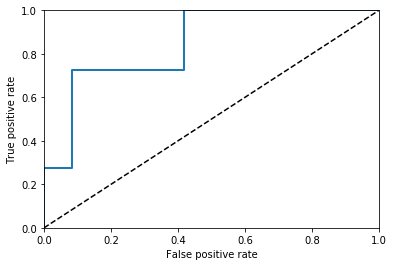

In [498]:
GaussianNB_name = models[4][0]
GaussianNB_model = models[4][1]
fpr,tpr,threshold = ROCCurveModel(GaussianNB_model,GaussianNB_name,X_test,y_test)
plot_roc_curve(fpr,tpr,GaussianNB_name)

In [478]:
models[5][0]

'Random Forest Classifier'

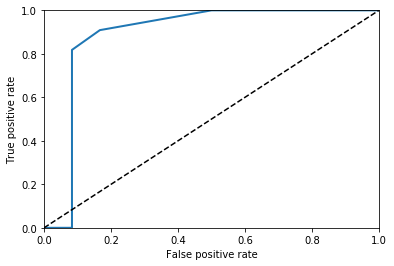

In [500]:
Random_Forest_Classifier_name = models[5][0]
Random_Forest_Classifier_model = models[5][1]
fpr,tpr,threshold = ROCCurveModel(Random_Forest_Classifier_model,Random_Forest_Classifier_name,X_test,y_test)
plot_roc_curve(fpr,tpr,Random_Forest_Classifier_name)


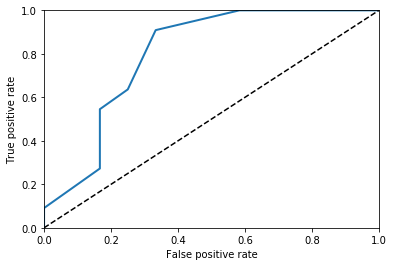

In [503]:
Gradient_Boosting_Classifier_name = models[5][0]
Gradient_Boosting_Classifier_model = models[5][1]
fpr,tpr,threshold = ROCCurveModel(Gradient_Boosting_Classifier_model,Gradient_Boosting_Classifier_name,X_test,y_test)
plot_roc_curve(fpr,tpr,Gradient_Boosting_Classifier_name)

## Test performance of models on test data

In [523]:
recall_scores,precision_scores,name,f1_scores = getRecallPrecisionModels(models,X_test,y_test)
scores_Models = pd.DataFrame({"recall_scores":recall_scores,"precision_scores":precision_scores,"name":name,"f1_scores":f1_scores})
scores_Models.sort_values("f1_scores",ascending=False)

,f1_scores,name,precision_scores,recall_scores
6,0.909091,Gradient Boosting Classifier,0.909091,0.909091
2,0.857143,KNeighbors Classifier,0.900000,0.818182
3,0.857143,Decision Tree,0.900000,0.818182
5,0.857143,Random Forest Classifier,0.900000,0.818182
4,0.720000,GaussianNB,0.642857,0.818182
1,0.571429,Logistic Regression,0.600000,0.545455
0,0.375000,SVC,0.600000,0.272727


In [524]:
models = getModels()
scores,names = getROCScoreModels(models,X_test,y_test)
ROC_Scores = pd.DataFrame({"Name" : names, "ROC AUC score" : scores})
ROC_Scores.sort_values("ROC AUC score",ascending=False)

SVC
Logistic Regression
KNeighbors Classifier
Decision Tree
GaussianNB
Random Forest Classifier
Gradient Boosting Classifier


,Name,ROC AUC score
5,Random Forest Classifier,0.954545
6,Gradient Boosting Classifier,0.931818
4,GaussianNB,0.848485
2,KNeighbors Classifier,0.840909
3,Decision Tree,0.821970
1,Logistic Regression,0.643939
0,SVC,0.534091


### Lets try feature selection

In [525]:
correlation_matrix["Target"].sort_values(ascending=False)

Target             1.000000
Plasma             0.466581
BMI                0.292695
AGE                0.238356
NOP                0.221898
PEDIGREE           0.173844
SERUM_INSULIN      0.130548
TSKIN_THICKNESS    0.074752
BP                 0.065068
Name: Target, dtype: float64

In [535]:
#diabetes_cleaned_data[:,"Plasma","BMI","AGE"]
diabetes_cleaned_data = diabetes_cleaned_data[["Plasma","BMI","AGE"]]

In [537]:
X=diabetes_cleaned_data


In [538]:
X_train,X_test, y_train,y_test = X[:700],X[700:],y[:700],y[700:]

In [540]:
models = getModels()
scores,names = getROCScoreModels(models,X_test,y_test)
ROC_Scores = pd.DataFrame({"Name" : names, "ROC AUC score" : scores})
ROC_Scores.sort_values("ROC AUC score",ascending=False)

SVC
Logistic Regression
KNeighbors Classifier
Decision Tree
GaussianNB
Random Forest Classifier
Gradient Boosting Classifier


,Name,ROC AUC score
6,Gradient Boosting Classifier,0.954545
2,KNeighbors Classifier,0.916667
5,Random Forest Classifier,0.916667
4,GaussianNB,0.893939
3,Decision Tree,0.867424
1,Logistic Regression,0.772727
0,SVC,0.549242
